In [1]:
######################################
#
# Topic Modeling with NMF and SVD
#
# matrix factorizations: Singular Value Decomposition (SVD) and 
#                        Non-negative Matrix Factorization (NMF)
#
##########################################
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition

In [3]:
%matplotlib inline
np.set_printoptions(suppress=True)   # use of scientific notation for small numbers

In [6]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [9]:
print(newsgroups_train.data[0:10])

["Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych", '\n\nSeems to be, barring evidence to the contrary, that Koresh was simply\nanother deranged fanatic who thought it neccessary to take a whole bunch of\nfolks with him, children and all, to satisfy his delusional mania. Jim\nJones, circa 1993.\n\n\nNope - fruitcakes like Koresh have been demonstrating such evil corruption\nfor centuries.', "\n >In article <1993Apr19.02035

In [10]:
newsgroups_train.filenames

array(['C:\\Users\\VijayKumar\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38816',
       'C:\\Users\\VijayKumar\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.religion.misc\\83741',
       'C:\\Users\\VijayKumar\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61092',
       ...,
       'C:\\Users\\VijayKumar\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38737',
       'C:\\Users\\VijayKumar\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\53237',
       'C:\\Users\\VijayKumar\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38269'],
      dtype='<U100')

In [11]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [12]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space', ...,
       'comp.graphics', 'alt.atheism', 'comp.graphics'], dtype='<U18')

In [13]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [14]:
num_topics, num_top_words = 6, 8

In [15]:
num_topics

6

In [17]:
# extract all the word counts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
vectorizer = CountVectorizer(stop_words='english')

In [19]:
vectorizer

CountVectorizer(stop_words='english')

In [20]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [23]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '000005102000',
 '000062david42',
 '0001',
 '000100255pixel',
 '00041032',
 '0004136',
 '0004246',
 '0004422',
 '00044513',
 '0004847546',
 '0005',
 '0007',
 '00090711',
 '000usd',
 '0012',
 '001200201pixel',
 '0018',
 '00196',
 '0020',
 '0022',
 '0028',
 '0029',
 '0033',
 '0034',
 '0038',
 '0049',
 '006',
 '0065',
 '0094',
 '0098',
 '00index',
 '00pm',
 '01',
 '0100',
 '013846',
 '01752',
 '0179',
 '01821',
 '01826',
 '0184',
 '01852',
 '01854',
 '01890',
 '018b',
 '0195',
 '0199',
 '01a',
 '02',
 '020',
 '0200',
 '020359',
 '020637',
 '02115',
 '02138',
 '02139',
 '02154',
 '02178',
 '0223',
 '0235',
 '023b',
 '0245',
 '03',
 '030',
 '0300',
 '03051',
 '0330',
 '034',
 '034101',
 '04',
 '040',
 '040286',
 '0410',
 '04110',
 '041493003715',
 '0418',
 '045',
 '04g',
 '05',
 '050',
 '0500',
 '050524',
 '0511',
 '05402',
 '05446',
 '0545',
 '054589e',
 '058',
 '06',
 '060',
 '0605',
 '06111',
 '06179397',
 '06487',
 '0649',
 '067',
 '0674',
 

In [24]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [25]:
vocab = np.array(vectorizer.get_feature_names())

In [26]:
vocab

array(['00', '000', '0000', ..., 'zware', 'zwarte', 'zyxel'], dtype='<U80')

In [27]:
vocab.shape

(26576,)

In [28]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

In [29]:
###################################################
#    Singular Value Decomposition (SVD)
#
#########################################################

In [30]:
#The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

In [31]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 1min 24s


In [32]:
U.shape , s.shape , Vh.shape

((2034, 2034), (2034,), (2034, 26576))

In [38]:
# confrim that U, s, Vh is a decomposition of the var Vectors
np.allclose(vectors, np.dot(U[:, :2034] * s, Vh))

True

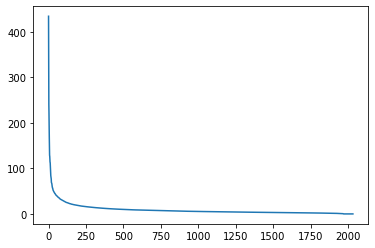

In [39]:
plt.plot(s)

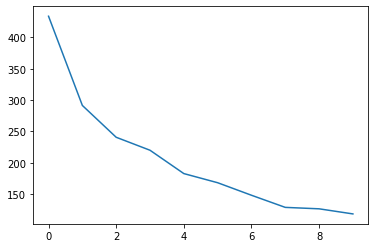

In [40]:
plt.plot(s[:10])

In [41]:
S = np.diag(s)

In [42]:
S

array([[433.92698542,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 291.51012741,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 240.71137677, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [43]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [44]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'edu graphics data space pub mail 128 3d',
 'space jesus launch god people satellite matthew atheists',
 'space launch satellite commercial nasa satellites market year',
 'jpeg graphics space pub edu ray mail send',
 'jesus matthew prophecy messiah psalm isaiah david said',
 'launch commercial satellite market image services satellites launches',
 'data available nasa ftp grass anonymous contact gov',
 'atheists god religious atheism religion believe belief atheist',
 'probe data surface moon mars probes lunar launch']

In [46]:
##############################################
#  Non-negative Matrix Factorization (NMF)
#
#  NMF is a factorization of a non-negative data set V:
#        V=WH
#
##################################################

In [47]:
m,n=vectors.shape
d=5  # num topics

In [48]:
m,n,d

(2034, 26576, 5)

In [52]:
# Sample
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
model = decomposition.NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_
print(X)
print(W)
print(H)


[[1.  1. ]
 [2.  1. ]
 [3.  1.2]
 [4.  1. ]
 [5.  0.8]
 [6.  1. ]]
[[0.         0.46880684]
 [0.55699523 0.3894146 ]
 [1.00331638 0.41925352]
 [1.6733999  0.22926926]
 [2.34349311 0.03927954]
 [2.78981512 0.06911798]]
[[2.09783018 0.30560234]
 [2.13443044 2.13171694]]


In [53]:
# end sample

In [55]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_
show_topics(H1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [56]:
#
#   Topic Frequency-Inverse Document Frequency 
#   
# way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

In [57]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_
show_topics(H1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

In [61]:
vectorizer_tfidf.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '000005102000',
 '000062david42',
 '0001',
 '000100255pixel',
 '00041032',
 '0004136',
 '0004246',
 '0004422',
 '00044513',
 '0004847546',
 '0005',
 '0007',
 '00090711',
 '000usd',
 '0012',
 '001200201pixel',
 '0018',
 '00196',
 '0020',
 '0022',
 '0028',
 '0029',
 '0033',
 '0034',
 '0038',
 '0049',
 '006',
 '0065',
 '0094',
 '0098',
 '00index',
 '00pm',
 '01',
 '0100',
 '013846',
 '01752',
 '0179',
 '01821',
 '01826',
 '0184',
 '01852',
 '01854',
 '01890',
 '018b',
 '0195',
 '0199',
 '01a',
 '02',
 '020',
 '0200',
 '020359',
 '020637',
 '02115',
 '02138',
 '02139',
 '02154',
 '02178',
 '0223',
 '0235',
 '023b',
 '0245',
 '03',
 '030',
 '0300',
 '03051',
 '0330',
 '034',
 '034101',
 '04',
 '040',
 '040286',
 '0410',
 '04110',
 '041493003715',
 '0418',
 '045',
 '04g',
 '05',
 '050',
 '0500',
 '050524',
 '0511',
 '05402',
 '05446',
 '0545',
 '054589e',
 '058',
 '06',
 '060',
 '0605',
 '06111',
 '06179397',
 '06487',
 '0649',
 '067',
 '0674',
 

In [62]:
print(W1,H1)

[[0.00184629 0.09795391 0.         0.00617658 0.00987797]
 [0.02899257 0.         0.00095132 0.         0.00682032]
 [0.01811117 0.00557737 0.00789343 0.02896533 0.        ]
 ...
 [0.00501303 0.09446731 0.00337837 0.02123326 0.        ]
 [0.05976245 0.00276049 0.         0.00224685 0.07556606]
 [0.         0.         0.         0.         0.        ]] [[0.         0.02345423 0.         ... 0.         0.         0.        ]
 [0.02517626 0.00583392 0.00121226 ... 0.00000071 0.00000143 0.00262822]
 [0.03351842 0.05978014 0.00338075 ... 0.00006206 0.00012413 0.00039153]
 [0.         0.         0.         ... 0.         0.         0.0001711 ]
 [0.         0.         0.         ... 0.00000803 0.00001606 0.        ]]


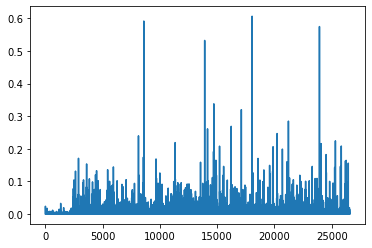

In [63]:
plt.plot(clf.components_[0])

In [64]:
clf.reconstruction_err_

43.71292605795277

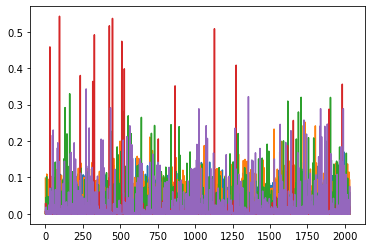

In [65]:
plt.plot(W1)

 ...]

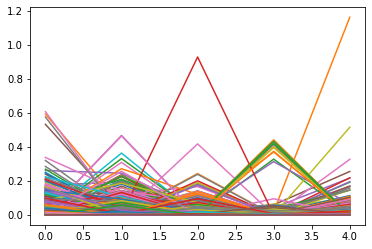

In [66]:
plt.plot(H1)

In [67]:
############################################################
#
#
#   Stochastic Gradient Descent (SGD)
#
#   For standard gradient descent, we evaluate the loss using all of our data which can be really slow.
#   In stochastic gradient descent, we evaluate our loss function on just a sample of our data (sometimes called a mini-batch). 
##################################################################

In [68]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [69]:
lam

1000.0

In [70]:
lr

0.01

In [71]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [72]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [73]:
mu = 1e-6
mu

1e-06

In [74]:
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH
    
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [75]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [76]:
report(vectors_tfidf, W, H)

44.4266085310955 3.928977336578437e-07 3.793723881770787e-07 0 0


In [77]:
upd(vectors_tfidf,W,H,lr)

In [78]:
report(vectors_tfidf, W, H)

44.41880936041924 -0.0008196908111165262 -7.219644773557724e-05 147 266


In [79]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.413087871099684 -0.0005814900403694149 -7.435744232696693e-05 124 260
44.37540990647276 -0.00040483324236271367 -5.173444869153712e-05 54 412
44.34689147245233 -0.00021112859932265562 -7.504263443873743e-05 36 948
44.31509674640167 -0.00019553532482217924 -7.9367740857445e-05 33 1451
44.28007507701896 -9.845391391216699e-05 -0.00010960286891694348 19 2161


In [80]:
show_topics(H)

['space don just god people like think know',
 'god just don think people space know does',
 'space don people god like does think just',
 'god people space just don like think know',
 'space don just god think people know like']

In [82]:
#
# Truncated SVD:-
#
#     Randomized SVD

In [83]:
vectors.shape

(2034, 26576)

In [84]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 1min 10s


In [85]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [86]:
# faster way to get svd:-
%time u, s, v = decomposition.randomized_svd(vectors, 5)

Wall time: 8.4 s


In [87]:
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [88]:
show_topics(v)

['jpeg image edu file graphics images gif data',
 'jpeg gif file color quality image jfif format',
 'space jesus launch god people satellite matthew atheists',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display']

In [89]:
#
#  Implementing our own Randomized SVD
#

In [90]:
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        # LU and QR factorizations
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

In [91]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [92]:
u, s, v = randomized_svd(vectors, 5)

In [93]:
%time u, s, v = randomized_svd(vectors, 5)

Wall time: 4.39 s


In [94]:
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [95]:
show_topics(v)

['jpeg image edu file graphics images gif data',
 'edu graphics data space pub mail 128 3d',
 'space jesus launch god people satellite matthew atheists',
 'jesus god matthew people atheists atheism does graphics',
 'jpeg graphics space pub edu ray mail send']

In [96]:
# The QR Decomposition :==> A = QR where Q = Orthonormal columns & R = Upper triangular

In [97]:
############ Thankyou #################################